#LOAD LIBRARIES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 
import chardet
import multiprocessing
import random

from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import timeit

#DATASET

## Read Dataset

In [0]:
df = pd.read_csv('/content/drive/My Drive/Copia de final_severity_dataset.csv')

In [5]:
df

,Enfermedad cardiovascular/Insuficiencia cardiaca,EPOC/Asma/Insuficiencia respiratoria,Diabetes/Obesidad,Hipertensión/Colesterol,Insuficiencia renal crónica,Cáncer,Enfermedad neurológica,Enfermedad hepática,Inmunodepresión,Age_0-9,Age_10-19,Age_20-29,Age_30-39,Age_40-49,Age_50-59,Age_60-69,Age_70-79,Age_80-89,Age_>90,Fumador_No,Fumador_Yes,Prob_lethality,State
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.411,Leve
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,60.411,Muy grave
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,22.053,Leve
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,60.411,Muy grave
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,34.839,Grave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,95.000,Muy grave
9724,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,95.000,Muy grave
9725,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,95.000,Muy grave
9726,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,95.000,Muy grave


#Split in Train/Validación/Test

We will use the usually recommended ratios as an example:

Train: 70%.

Validation: 15%.

Test: 15%.

In [6]:
df.columns

Index(['Enfermedad cardiovascular/Insuficiencia cardiaca',
       'EPOC/Asma/Insuficiencia respiratoria', 'Diabetes/Obesidad',
       'Hipertensión/Colesterol', 'Insuficiencia renal crónica', 'Cáncer',
       'Enfermedad neurológica', 'Enfermedad hepática', 'Inmunodepresión',
       'Age_0-9', 'Age_10-19', 'Age_20-29', 'Age_30-39', 'Age_40-49',
       'Age_50-59', 'Age_60-69', 'Age_70-79', 'Age_80-89', 'Age_>90',
       'Fumador_No', 'Fumador_Yes', 'Prob_lethality', 'State'],
      dtype='object')

In [0]:
X=pd.DataFrame()

In [0]:
y = df['State']
X = df.loc[:, df.columns != 'State']
X = X.loc[:, X.columns != 'Fumador_No']
X = X.loc[:, X.columns != 'Prob_lethality']

In [9]:
X = X.apply(pd.to_numeric) 
X

,Enfermedad cardiovascular/Insuficiencia cardiaca,EPOC/Asma/Insuficiencia respiratoria,Diabetes/Obesidad,Hipertensión/Colesterol,Insuficiencia renal crónica,Cáncer,Enfermedad neurológica,Enfermedad hepática,Inmunodepresión,Age_0-9,Age_10-19,Age_20-29,Age_30-39,Age_40-49,Age_50-59,Age_60-69,Age_70-79,Age_80-89,Age_>90,Fumador_Yes
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0
9724,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0
9725,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0
9726,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0


In [0]:
perc_values = [0.7, 0.15, 0.15];

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train_rand, X_valtest_rand, y_train_rand, y_valtest_rand = train_test_split(X, y, test_size=perc_values[1] + perc_values[2], random_state=1);

X_val_rand, X_test_rand, y_val_rand, y_test_rand = train_test_split(X_valtest_rand, y_valtest_rand, test_size= perc_values[2] / (perc_values[1] + perc_values[2]), random_state=1)

In [13]:
print('Train data size = ' + str(X_train_rand.shape))
print('Train target size = ' + str(y_train_rand.shape))
print('Validation data size = ' + str(X_val_rand.shape))
print('Validation target size = ' + str(y_val_rand.shape))
print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

Train data size = (6809, 20)
Train target size = (6809,)
Validation data size = (1459, 20)
Validation target size = (1459,)
Test data size = (1460, 20)
Test target size = (1460,)


#RANDOM FOREST

1) Import model.

In this case we have to go outside of scikit-learn to apply Random Forest Classifier model.

In [0]:
from sklearn.ensemble import RandomForestClassifier

2) Import metric

In [0]:
from sklearn.metrics import roc_auc_score as auc;
from sklearn.metrics import confusion_matrix as confusion_matrix;
from sklearn.metrics import accuracy_score as acc;

3) Define the method

In [16]:
model = RandomForestClassifier(n_estimators = 10,  random_state = 1)

model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

4) Call the fit method to train the model

In [17]:
start = timeit.default_timer()

model.fit(X_train_rand, np.array(y_train_rand))

stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.050818770000034874


5) Call the predict method to generate the predictions.

In [18]:
start = timeit.default_timer()

pred_train = model.predict(X_train_rand)
pred_val = model.predict(X_val_rand)
pred_test = model.predict(X_test_rand)

stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.019018961000028867


In [0]:


# Label test

lb = preprocessing.LabelBinarizer()
lb.fit(y_test_rand)

y_test_lb = lb.transform(y_test_rand)
val_lb = lb.transform(pred_test)

#Label train

lb.fit(y_train_rand)

y_train_lb = lb.transform(y_train_rand)
val_train_lb = lb.transform(pred_train)

#Label validation

lb.fit(y_val_rand)

y_val_lb = lb.transform(y_val_rand)
val_val_lb = lb.transform(pred_val)


6) Calculate metrics using the predictions obtained in the previous step.

In [0]:
auc_train = auc(y_train_lb, val_train_lb, average='macro');
auc_val = auc(y_val_lb, val_val_lb, average='macro');
auc_test = auc(y_test_lb, val_lb, average='macro');
results = pd.DataFrame()
results = results.append(pd.DataFrame(data={'model':['Random Forest (Default)'],'auc_train':[auc_train],'auc_val':[auc_val],'auc_test':[auc_test]}, columns=['model',  'auc_train','auc_val', 'auc_test']), ignore_index=True)

In [21]:
results

,model,auc_train,auc_val,auc_test
0,Random Forest (Default),0.999425,0.971118,0.957869


In [0]:
acc_train = acc(y_train_lb, val_train_lb);
acc_val = acc(y_val_lb, val_val_lb);
acc_test = acc(y_test_lb, val_lb);
results2 = pd.DataFrame()
results2 = results2.append(pd.DataFrame(data={'model':['Random Forest (Default)'],'acc_train':[acc_train],'acc_val':[acc_val],'acc_test':[acc_test]}, columns=['model',  'acc_train','acc_val', 'acc_test']), ignore_index=True)

In [60]:
results2

,model,acc_train,acc_val,acc_test
0,Random Forest (Default),0.999853,0.986977,0.978082


## Importance of features

In [0]:
importances = list(model.feature_importances_)

In [0]:
# tuplas de importancia y variable
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(X, importances)]
# Ordenamos las variables por importancia
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)


In [24]:
[print(pair) for pair in feature_importances];

('Enfermedad cardiovascular/Insuficiencia cardiaca', 0.241)
('Diabetes/Obesidad', 0.193)
('Hipertensión/Colesterol', 0.131)
('EPOC/Asma/Insuficiencia respiratoria', 0.095)
('Age_80-89', 0.051)
('Age_>90', 0.05)
('Age_70-79', 0.036)
('Fumador_Yes', 0.028)
('Cáncer', 0.026)
('Insuficiencia renal crónica', 0.025)
('Enfermedad neurológica', 0.023)
('Enfermedad hepática', 0.015)
('Inmunodepresión', 0.013)
('Age_60-69', 0.012)
('Age_20-29', 0.011)
('Age_30-39', 0.011)
('Age_40-49', 0.011)
('Age_10-19', 0.01)
('Age_50-59', 0.009)
('Age_0-9', 0.006)


20

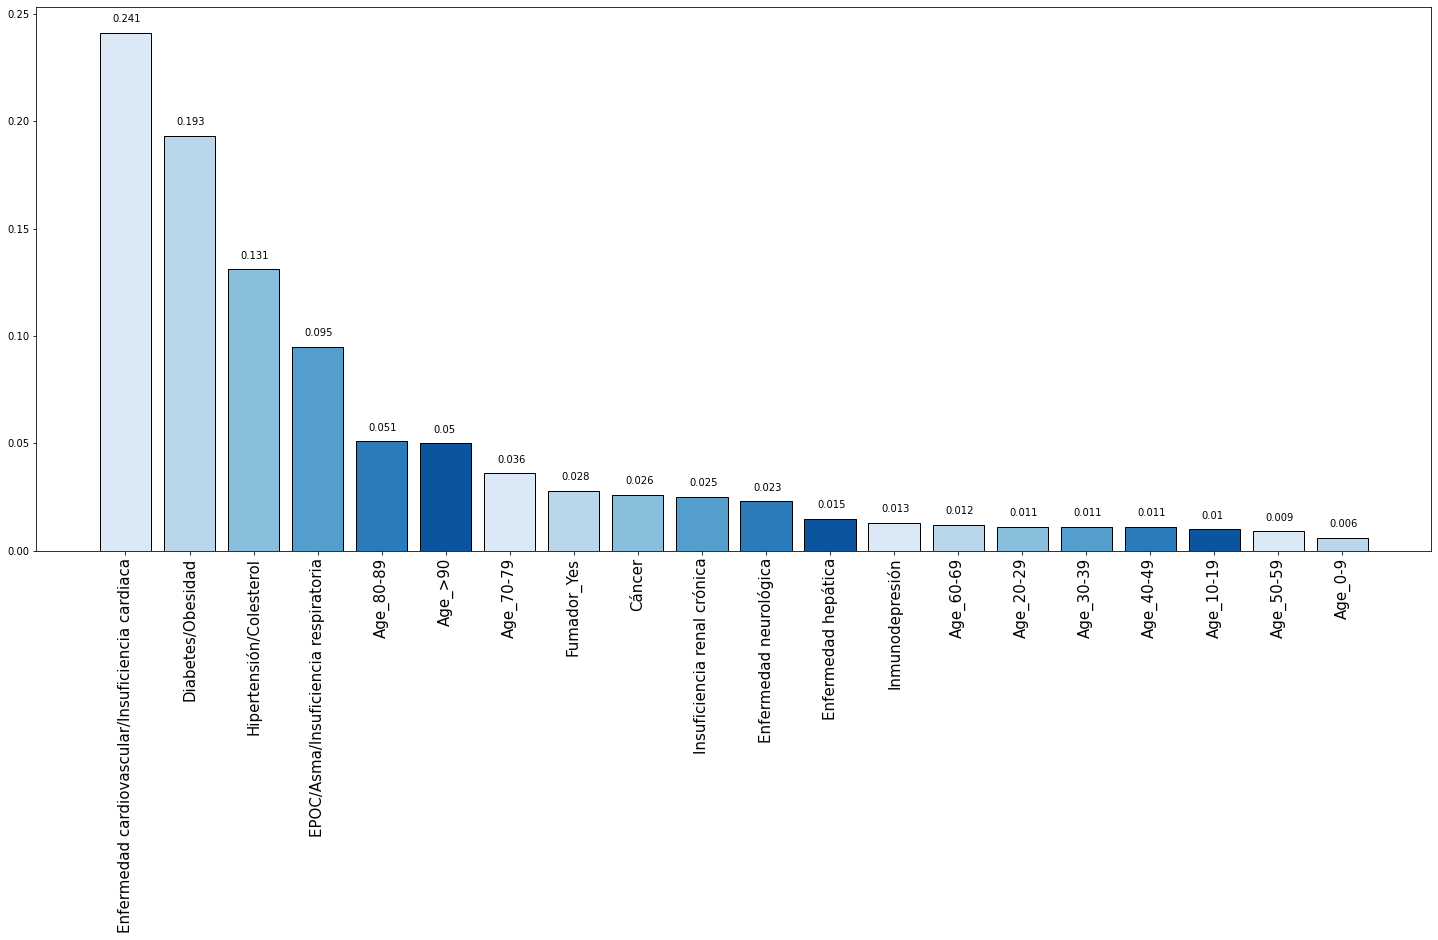

In [57]:
import seaborn as sns
r4=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
variables = [0]*len(feature_importances)
pesos = [0]*len(feature_importances)

for x in range(len(feature_importances)):
  variables[x], pesos[x] = feature_importances[x]


plt.figure(figsize=(25,10))

#Plot the data:
my_colors = sns.color_palette("Blues")

plt.bar(r4, pesos, width = 0.8, edgecolor='black',color = my_colors)

plt.xticks([r for r in range(len(r4))],variables, rotation=90,fontsize=15)

label = pesos

for i in range(len(r4)):
  plt.text(x = r4[i]-0.2 , y = pesos[i]+0.005, s = label[i], size = 10)